In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Retail Sales Analysis_utf.csv")

In [3]:
df.dropna(inplace = True)

In [4]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [5]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')

UNIVARIATE ANALYSIS

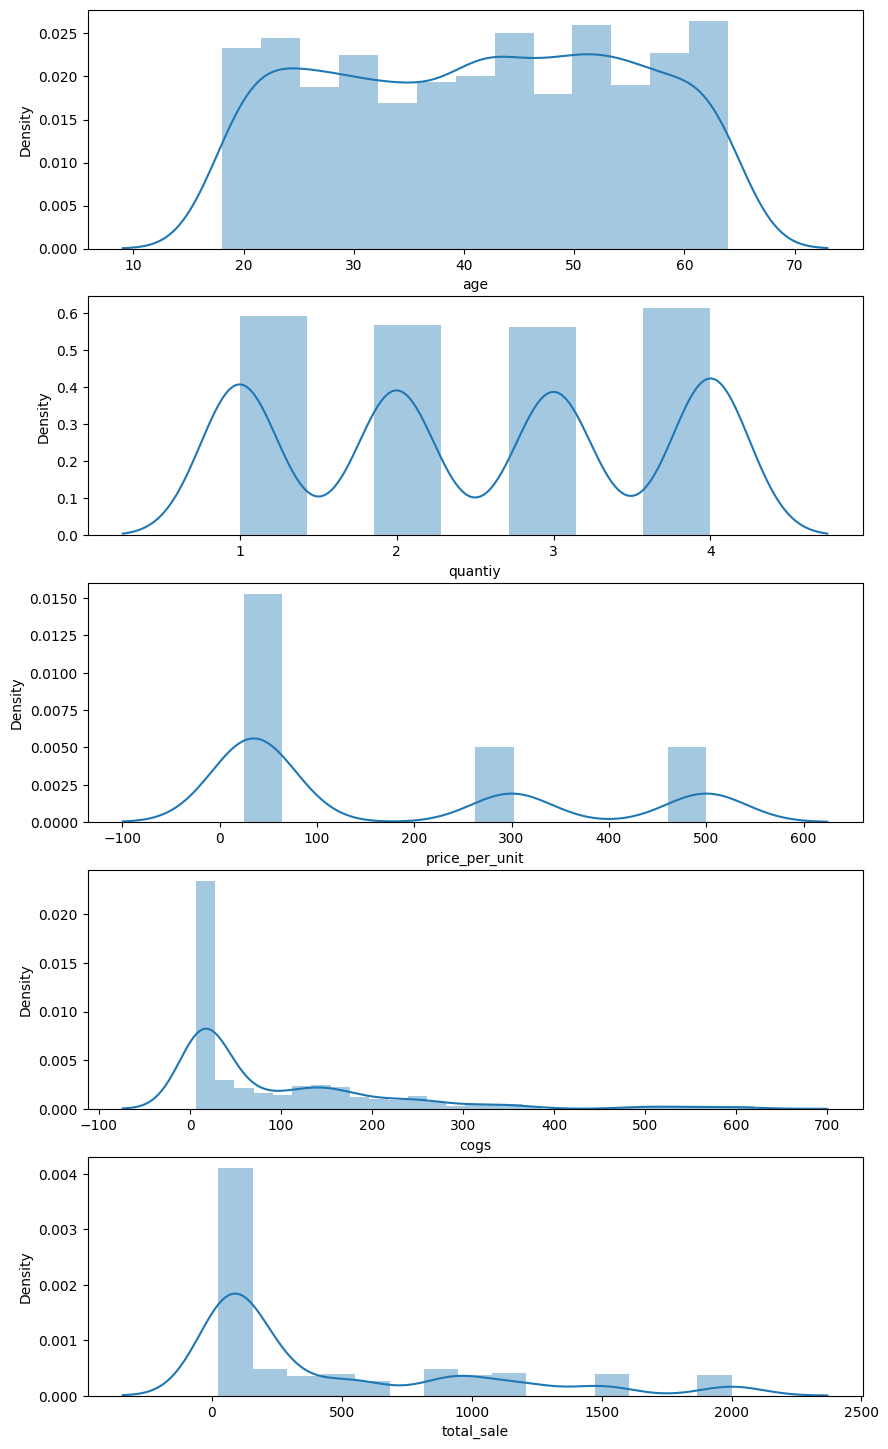

In [6]:
columns = ['age','quantiy', 'price_per_unit', 'cogs', 'total_sale']
plt.figure(figsize = (10,18))
for i in range(len(columns)):
    plt.subplot(5,1,i+1)
    sns.distplot(df[columns[i]])

PLOTS ON BASIS OF GENDER AND CATEGORY

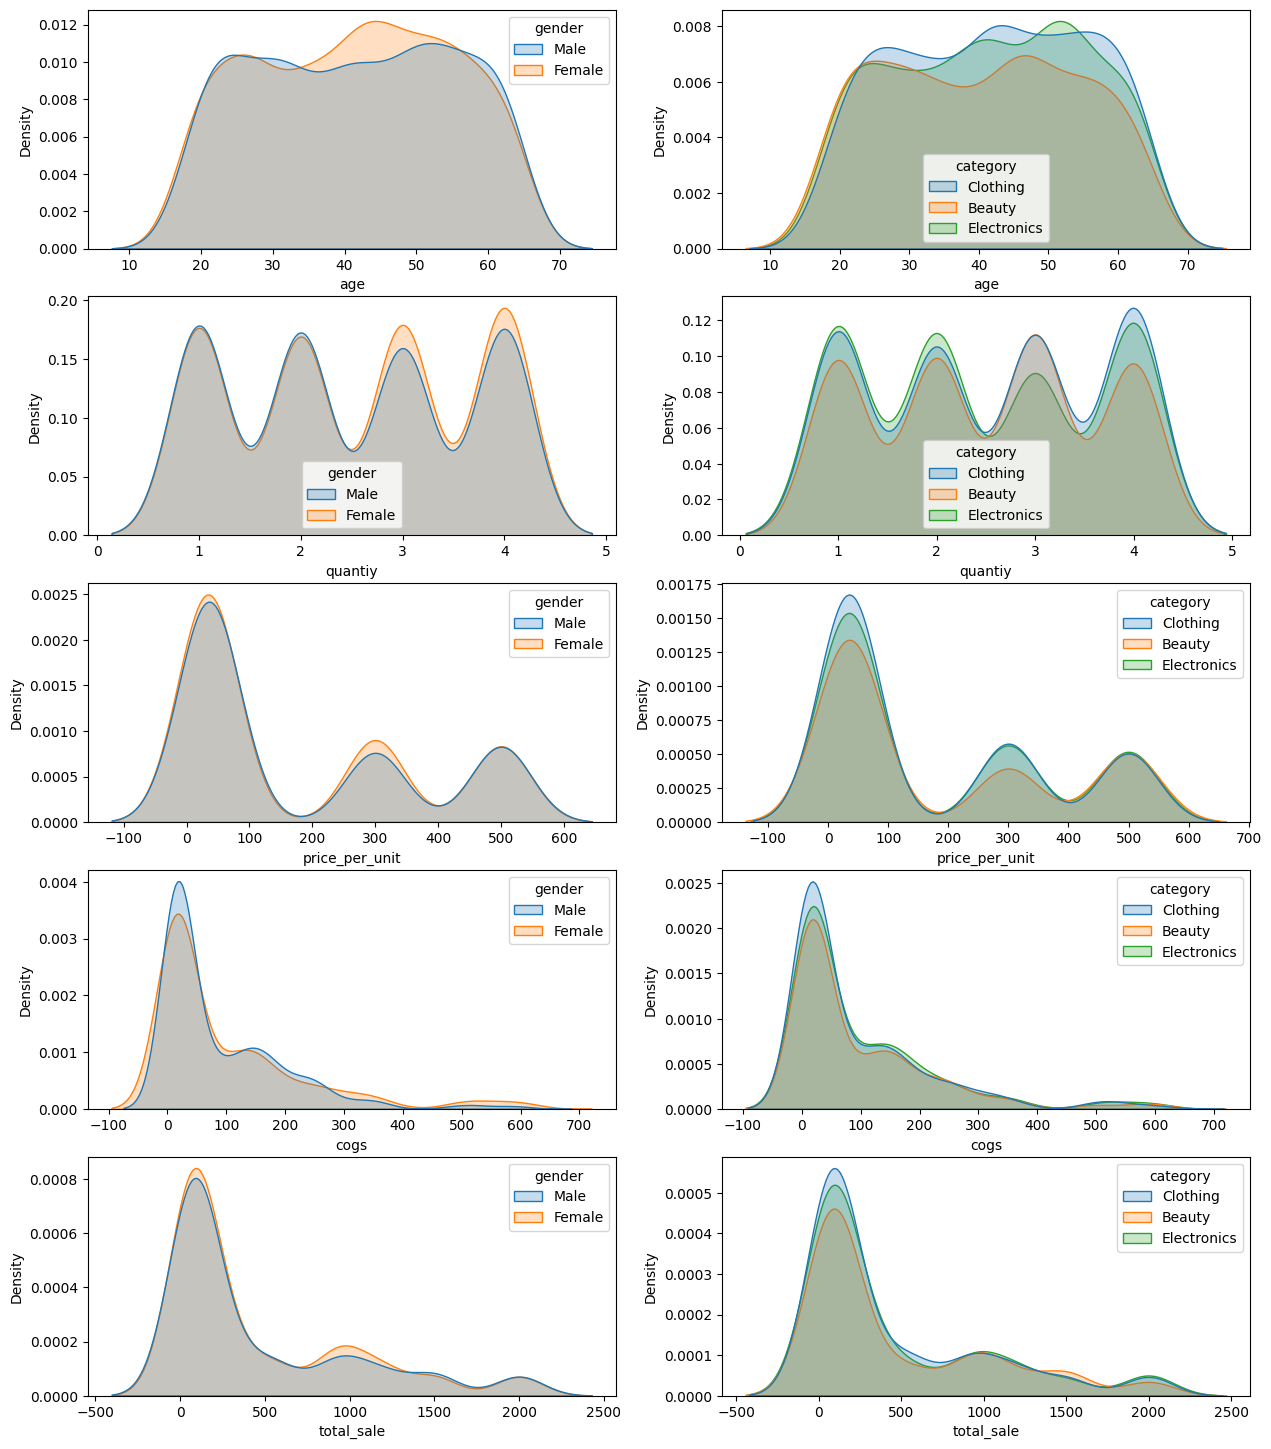

In [7]:
plt.figure(figsize = (15,18))
hues = ['gender','category']
for i in range(len(columns)):
    for j in range(len(hues)):
        plt.subplot(5,2,2*i+j+1)
        sns.kdeplot( x = columns[i],data= df, shade = True , hue = hues[j])


BIVARIATE ANALYSIS

In [8]:
drops = ['transactions_id', 'sale_date', 'sale_time', 'customer_id']
for i in drops:
    df = df.drop(i, axis = 1)

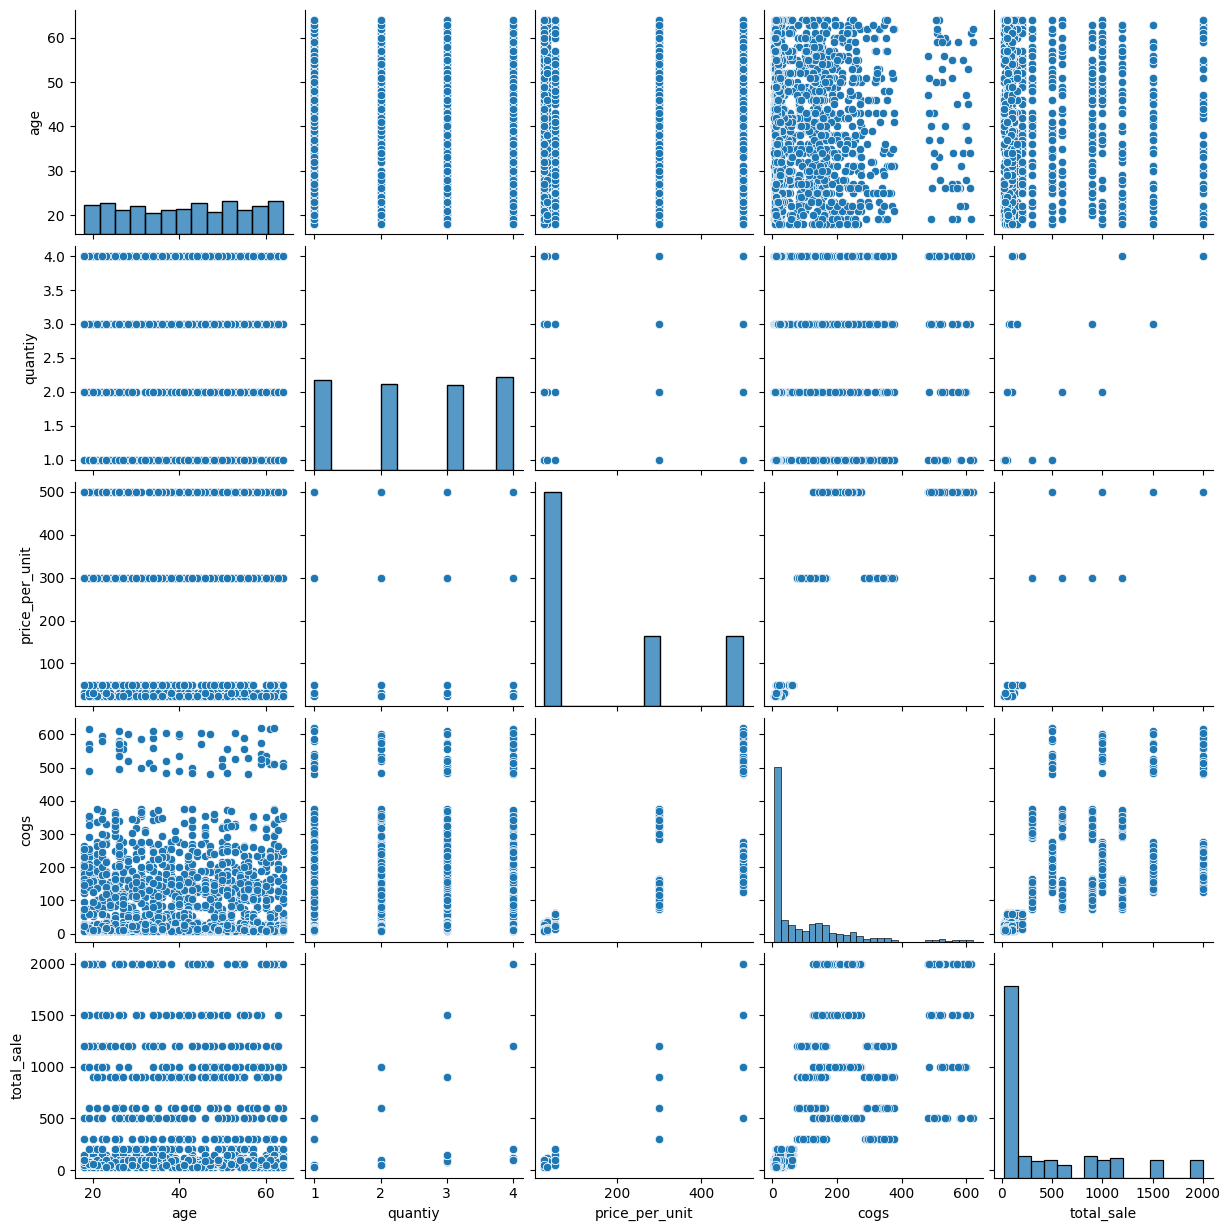

In [9]:
sns.pairplot(df)

In [10]:
df.columns

Index(['gender', 'age', 'category', 'quantiy', 'price_per_unit', 'cogs',
       'total_sale'],
      dtype='object')

In [14]:
df.groupby(['gender'])[['age','quantiy', 'price_per_unit', 'cogs','total_sale']].mean()

,age,quantiy,price_per_unit,cogs,total_sale
gender,,,,,
Female,41.287549,2.542490,180.311265,101.668231,457.618577
Male,41.417436,2.484103,179.523077,88.245692,456.533333


Clustering:

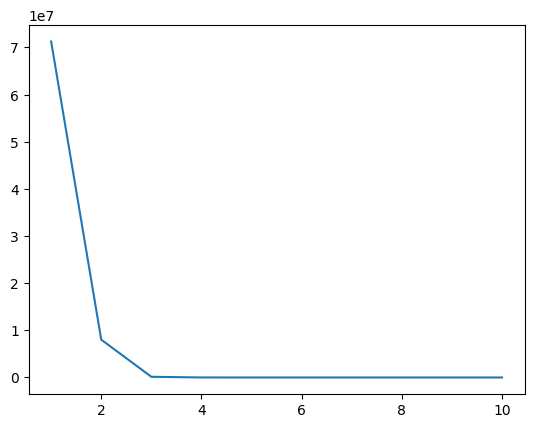

In [15]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['price_per_unit']])
    intertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11) , intertia_scores)

In [16]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['price_per_unit']])
df['ppu cluster'] = clustering1.labels_
df.groupby('ppu cluster')[['age','quantiy', 'price_per_unit', 'cogs','total_sale']].mean()

,age,quantiy,price_per_unit,cogs,total_sale
ppu cluster,,,,,
0,41.832360,2.481234,35.28774,19.441034,87.931610
1,40.563452,2.497462,500.00000,256.637056,1248.730964
2,40.675127,2.629442,300.00000,163.713198,788.832487


bivariate

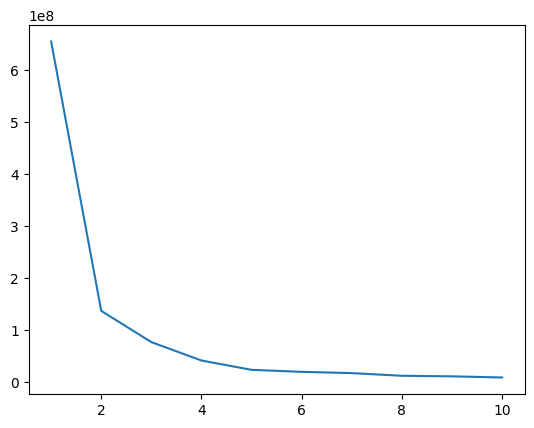

In [17]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['cogs','total_sale']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

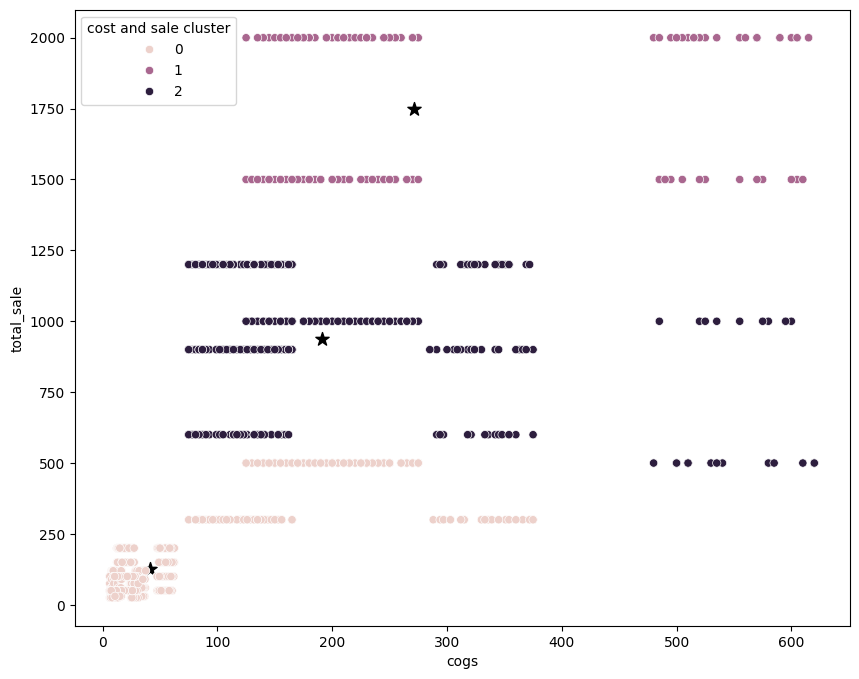

In [26]:
clustering2 = KMeans(n_clusters=3)
clustering2.fit(df[['cogs','total_sale']])
df['cost and sale cluster'] =clustering2.labels_
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s = 100, c='black',marker='*')
sns.scatterplot(data=df, x ='cogs',y='total_sale',hue='cost and sale cluster')
plt.savefig('clustering_bivaraiate.png')